### Clustering Analysis - 
Goal: Group occupations based on their educational profiles (distribution of education levels required).
#### Method:
- Standardized the data to ensure all education columns (e.g., "Bachelor's degree," "High school diploma") were on the same scale.
- Applied K-Means Clustering to group jobs into clusters where occupations had similar education level distributions.
#### Key Outputs:
Identified 3 optimal clusters using the Elbow Method:
 - Cluster 1: Occupations with lower educational requirements.
 - Cluster 2: Occupations with a mix of mid-level education (e.g., associate's, bachelor's degrees).
 - Cluster 3: Occupations with higher education levels (e.g., master's, doctoral degrees).

#### What we want to do:
- Examine the centers of each cluster to interpret the typical educational profile of jobs in that group.
- List occupations in each cluster to identify patterns or industry-specific trends.
#### Insights Examples:
- Jobs in Cluster 1 may represent sectors accessible to a general workforce (e.g., trades, entry-level roles).
- Jobs in Cluster 3 are likely specialized, requiring advanced education or skills (e.g., healthcare, academia).

#### Alignment with Job Projections

Goal: Compare the educational profiles of clusters to job growth projections from the occupation data.
#### What we did:
- Merged the clusters with job growth rates from the occupation data.
- Calculated average job growth for each cluster to identify:
- High-growth clusters that may lack adequate educational supply.
- Low-growth clusters where over qualification may be a concern.
#### Insights:
- Identified areas where skill gaps exist or where future educational needs may need adjustment.

In [3]:
import pandas as pd

# Load the uploaded Excel files to examine their structure and data
education_file_path = 'education.xlsx'
occupation_file_path = 'occupation.xlsx'

# Load the sheets from the files
education_data = pd.ExcelFile(education_file_path)
occupation_data = pd.ExcelFile(occupation_file_path)

# Display sheet names to understand the structure
education_sheets = education_data.sheet_names
occupation_sheets = occupation_data.sheet_names

education_sheets, occupation_sheets


(['Index', 'Table 5.2', 'Table 5.3', 'Table 5.4'],
 ['Index',
  'Table 1.1',
  'Table 1.2',
  'Table 1.3',
  'Table 1.4',
  'Table 1.5',
  'Table 1.6',
  'Table 1.7',
  'Table 1.10',
  'Table 1.11',
  'Table 5.3',
  'Table 5.4'])

In [2]:
%pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the 'Index' sheet from both files to examine their content
education_index = education_data.parse('Index')
occupation_index = occupation_data.parse('Index')

# Display the first few rows from both index sheets
education_index.head(), occupation_index.head()


(                             Education.xlsx contents
 0  Table 5.2 Employment, wages, and projected cha...
 1  Table 5.3 Educational attainment for workers 2...
 2  Table 5.4 Education and training assignments b...,
                             Occupation.xlsx Contents
 0  Table 1.1 Employment by major occupational gro...
 1  Table 1.2 Employment by detailed occupation, 2...
 2  Table 1.3 Fastest growing occupations, 2019 an...
 3  Table 1.4 Occupations with the most job growth...
 4  Table 1.5 Fastest declining occupations, 2019 ...)

In [8]:
# Load and display the first few rows of 'Table 5.3' from the education file
education_table_5_3 = education_data.parse('Table 5.3')
education_table_5_3.columns = education_table_5_3.iloc[0]
education_table_5_3 = education_table_5_3[1:]
education_table_5_3.head()

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
1,"Total, all occupations",00-0000,7.9,23.6,20,9.5,23.9,10.6,4.4
2,Chief executives(1),11-1011,1.6,8,13.9,4.8,41,24.1,6.5
3,General and operations managers,11-1021,2.6,16.9,24.3,10,33.4,11.1,1.7
4,Legislators(1),11-1031,1.6,8,13.9,4.8,41,24.1,6.5
5,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2


In [7]:
occupation_table_5_3 = occupation_data.parse('Table 5.3')
occupation_table_5_3.columns = occupation_table_5_3.iloc[0]
occupation_table_5_3 = occupation_table_5_3[1:]
occupation_table_5_3.head()

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
1,"Total, all occupations",00-0000,7.9,23.6,20,9.5,23.9,10.6,4.4
2,Chief executives(1),11-1011,1.6,8,13.9,4.8,41,24.1,6.5
3,General and operations managers,11-1021,2.6,16.9,24.3,10,33.4,11.1,1.7
4,Legislators(1),11-1031,1.6,8,13.9,4.8,41,24.1,6.5
5,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
education_columns = ["Less than high school diploma",
                     "High school diploma or equivalent",
                     "Some college, no degree",
                     "Associate's degree",
                     "Bachelor's degree",
                     "Master's degree",
                     "Doctoral or professional degree"]
occupation_table_5_3[education_columns]

,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
1,7.9,23.6,20,9.5,23.9,10.6,4.4
2,1.6,8,13.9,4.8,41,24.1,6.5
3,2.6,16.9,24.3,10,33.4,11.1,1.7
4,1.6,8,13.9,4.8,41,24.1,6.5
5,1.1,1.8,10.6,6.2,65.6,12.7,2
...,...,...,...,...,...,...,...
791,17.4,49.6,19.6,6.2,5.8,1.4,0.1
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Remove rows with missing values in any of the education columns
occupation_table_5_3 = occupation_table_5_3.dropna(subset=education_columns)

In [18]:
data_for_clustering = occupation_table_5_3[education_columns].apply(pd.to_numeric, errors='coerce')

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [21]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(scaled_data)

In [22]:
# Add cluster labels to the DataFrame
occupation_table_5_3['Cluster'] = clusters

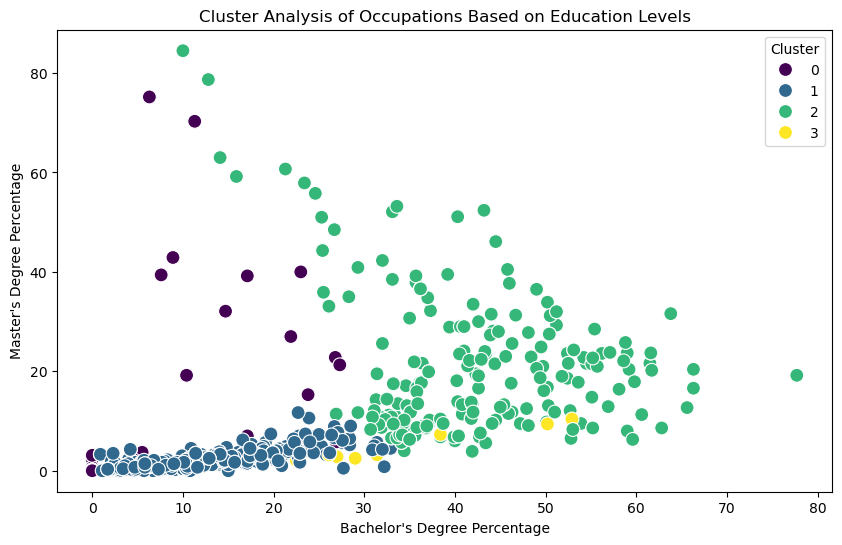

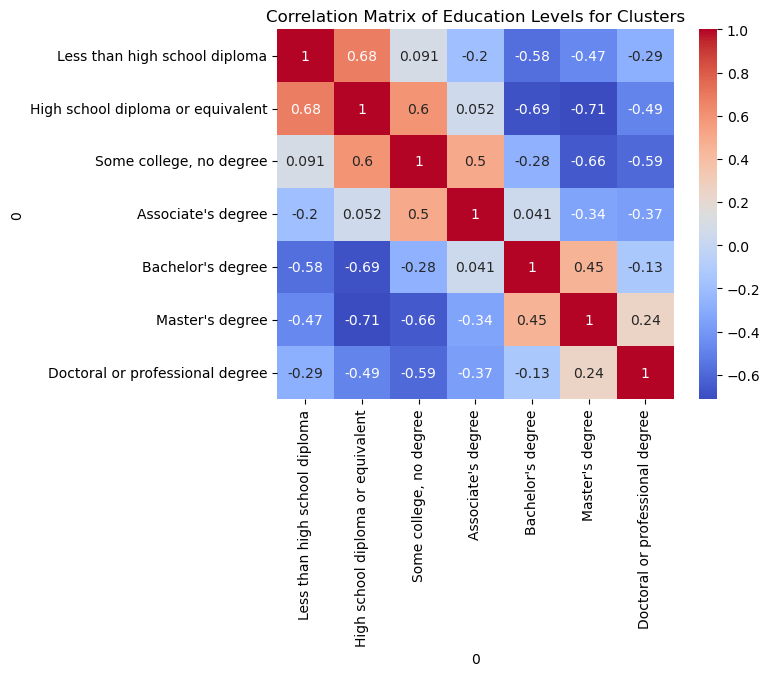

In [25]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_for_clustering['Bachelor\'s degree'], y=data_for_clustering['Master\'s degree'],
                hue=clusters, palette="viridis", s=100, marker='o')

plt.title("Cluster Analysis of Occupations Based on Education Levels")
plt.xlabel("Bachelor's Degree Percentage")
plt.ylabel("Master's Degree Percentage")
plt.legend(title="Cluster")
plt.show()

# Optionally: You can also visualize the clustering with a heatmap
sns.heatmap(data_for_clustering.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Education Levels for Clusters")
plt.show()

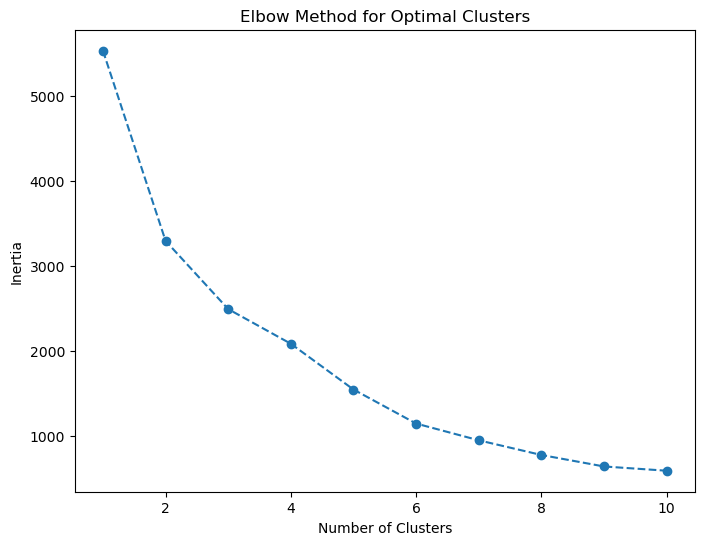

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(occupation_table_5_3[education_columns])

# Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):  # Try clustering from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# After reviewing the elbow plot, choose the number of clusters (e.g., 4 or the "elbow" point)
optimal_clusters = 3  # Choose based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
occupation_table_5_3['Cluster'] = clusters

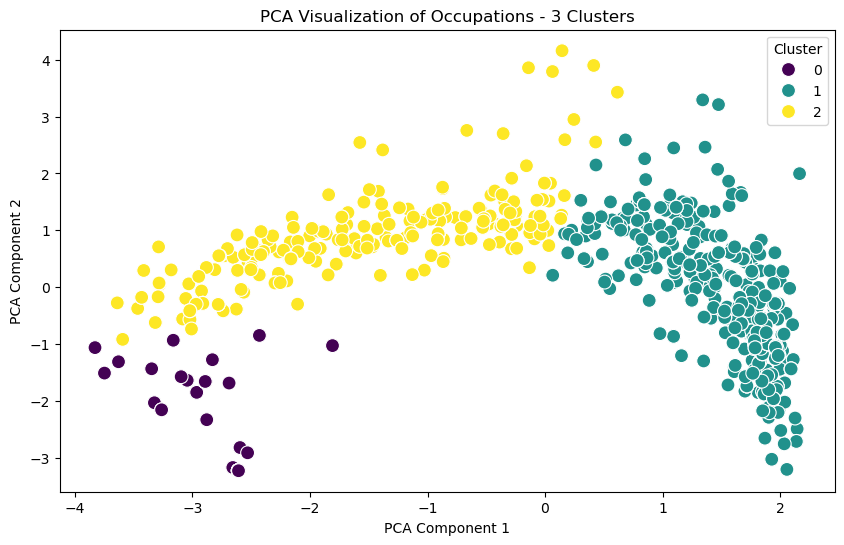

In [34]:
# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=clusters, palette='viridis', data=pca_df, s=100, marker='o')
plt.title(f'PCA Visualization of Occupations - {optimal_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### What This Analysis Can Reveal:
##### Cluster Characteristics:
- Clusters with high levels of education (e.g., Master's, PhD-heavy) may align with occupations requiring specialized skills.
- Clusters with lower education levels may highlight jobs accessible to the general workforce.
##### Alignment Issues:
- Compare the cluster characteristics to job projections or regional workforce data.
- Highlight clusters where education levels are mismatched with job growth (e.g., low supply of bachelor's degrees for high-growth jobs).
##### Policy Recommendations:
- Develop strategies to bridge skill gaps (e.g., reskilling or upskilling programs).
- Suggest educational reforms to meet future workforce needs.